# Exploratory Data Analysis: Prostate Segmentation from MRI 

## Background

In [3]:
%cd ..

import SimpleITK as sitk
import numpy as np
import prostate_mri
import importlib
import einops
import matplotlib.pyplot as plt
import pandas as pd

/Users/paulwilson/projects/medical_imaging/prostate-segmentation


In [4]:

importlib.reload(prostate_mri)
ds = prostate_mri.ProstateMRIDataset('./TrainingData')


In [5]:
ds.reference_spacing

Creating lookup table:   0%|          | 0/200 [00:00<?, ?it/s]/Users/paulwilson/projects/medical_imaging/prostate-segmentation/prostate_mri.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._lookup['mri_filepath'][case_number] = filepath
/Users/paulwilson/miniforge3/envs/sitk/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
Getting data statistics: 100%|██████████| 50/50 [00:03<00:00, 13.07it/s]


(0.625, 0.625, 3.5999999046325684)

In [6]:
pd.DataFrame(ds.data['prostate_volume'] - ds.data_resampled['prostate_volume']).describe()

Getting resampled data statistics: 100%|██████████| 50/50 [00:04<00:00, 10.08it/s]


,prostate_volume
count,50.000000
mean,-369.994171
std,803.974243
min,-2916.953125
25%,-678.494141
50%,0.000000
75%,0.003906
max,940.363281


In [7]:
# get mri and mask as np array
arrays = ds.get_np_array(33)
mri_array = arrays['mri']
seg_array = arrays['seg']

# find index of largest prostate area
areas = einops.reduce(seg_array, 'z y x -> z', 'sum')
max_index = np.argmax(areas, axis=0)
roi_mri_slice = mri_array[max_index]
roi_seg_slice = seg_array[max_index]


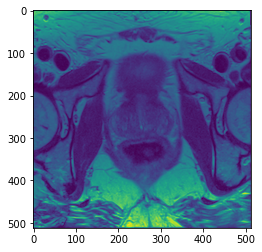

In [8]:
plt.imshow(roi_mri_slice)

In [9]:
mri_array = arrays['mri']
seg_array = arrays['seg']

In [10]:
areas = einops.reduce(seg_array, 'z y x -> z', 'sum')

In [11]:
max_index = np.argmax(areas)

In [12]:
max_index

13

In [13]:
areas

array([    0,     0,     0,     0,     0,  2206,  3110,  4634,  8681,
        9962, 10642, 11162, 11527, 11915, 10294,  6389,  4511,  3235,
           0,     0,     0,     0,     0])

In [14]:
filter = sitk.ResampleImageFilter()

In [15]:
filter.SetInterpolator(sitk.sitkLinear)

In [16]:
image = ds.get_sitk_image(0)['mri']

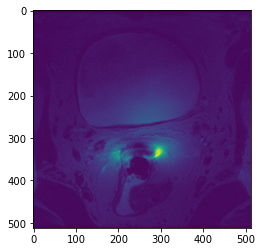

In [17]:
plt.imshow(sitk.GetArrayViewFromImage(image)[40])

In [18]:
filter = sitk.ResampleImageFilter()

transform = sitk.sitkIdentity

In [19]:
sitk.sitkIdentity

0

In [20]:
plt.imshow(sitk.GetArrayViewFromImage(filter.Execute(image))[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [21]:
sitk.Transform()

<SimpleITK.SimpleITK.Transform; proxy of <Swig Object of type 'itk::simple::Transform *' at 0x11ffa7ba0> >

In [22]:
ref_image = ds.get_sitk_image(14)['mri']

In [23]:
filter = sitk.ResampleImageFilter()

In [24]:
filter.SetReferenceImage(ref_image)

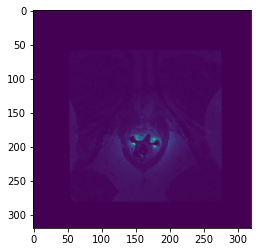

In [25]:
plt.imshow(sitk.GetArrayViewFromImage(filter.Execute(image))[4])

In [26]:
filtered_image = filter.Execute(image)

In [27]:
filtered_image.GetSpacing()

(0.625, 0.625, 3.6)

In [28]:
filtered_image.GetSize()

(320, 320, 20)

In [29]:
filtered_image.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [30]:
filter = sitk.ResampleImageFilter()

In [31]:
filter.SetOutputSpacing(ref_image.GetSpacing())
filter.SetTransform(sitk.Transform(3, sitk.sitkAffine))
filter.SetReferenceImage(image)

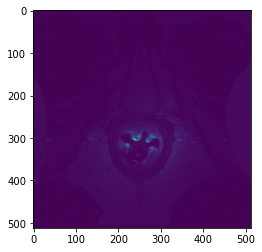

In [32]:
plt.imshow(sitk.GetArrayViewFromImage(filter.Execute(image))[4])

In [33]:
filter.Execute(image).GetSpacing()

(0.273438, 0.273437, 2.20001)

In [34]:
def resample_volume(volume_path, interpolator = sitk.sitkLinear, new_spacing = [0.39, 0.39, 0.55]):
    volume = sitk.ReadImage(volume_path, sitk.sitkFloat32) # read and cast to float32
    original_spacing = volume.GetSpacing()
    original_size = volume.GetSize()
    new_size = [int(round(osz*ospc/nspc)) for osz,ospc,nspc in zip(original_size, original_spacing, new_spacing)]
    return sitk.Resample(volume, new_size, sitk.Transform(), interpolator,
                         volume.GetOrigin(), new_spacing, volume.GetDirection(), 0,
                         volume.GetPixelID())
    


In [35]:
class A:
    def __init__(self):
        self._name = 'secret_name'

In [36]:
a = A()

In [37]:
ds.data.describe()

,D_x,D_y,D_z,S_x,S_y,S_z,voxel_volume,max_mri_intensity,min_mri_intensity,mean_mri_intensity,std_mri_intensity,seg_total_voxels,prostate_volume,total_image_volume
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.00000,50.000000,5.000000e+01
mean,403.200012,403.200012,27.540001,0.494469,0.494469,3.268613,0.939614,6175.640137,0.0,304.680084,261.412720,101818.65625,54721.625000,2.877957e+06
std,98.683578,98.683578,9.678948,0.155425,0.155425,0.519626,0.580315,8474.038086,0.0,187.971756,128.994385,104679.00000,45378.417969,5.210557e+05
min,256.000000,256.000000,15.000000,0.273438,0.273435,2.199940,0.164484,402.000000,0.0,62.006592,41.628963,10616.00000,14928.750000,1.811070e+06
25%,320.000000,320.000000,20.750000,0.351563,0.351563,3.000065,0.370799,1637.000000,0.0,209.517189,211.905540,30610.00000,34677.147461,2.685638e+06
50%,320.000000,320.000000,24.000000,0.612500,0.612500,3.600000,1.406249,2280.000000,0.0,258.173447,237.795227,57587.50000,43269.949219,2.880000e+06
75%,512.000000,512.000000,28.750000,0.625000,0.625000,3.600000,1.406250,4095.000000,0.0,316.333618,272.393562,130887.25000,55656.659180,3.398395e+06
max,512.000000,512.000000,54.000000,0.750000,0.750000,4.000010,2.250000,32767.000000,0.0,940.374146,671.072083,508797.00000,315390.937500,4.032000e+06


In [38]:
ds.data.sort_values(by='prostate_volume', ascending=False)

,D_x,D_y,D_z,S_x,S_y,S_z,voxel_volume,max_mri_intensity,min_mri_intensity,mean_mri_intensity,std_mri_intensity,seg_total_voxels,prostate_volume,total_image_volume
case,,,,,,,,,,,,,,
23,320.0,320.0,20.0,0.625000,0.625000,3.60000,1.406250,1562.0,0.0,321.365936,228.714890,224278.0,315390.937500,2880000.000
6,512.0,512.0,39.0,0.312499,0.312496,2.79993,0.273426,21811.0,0.0,579.621765,431.678619,508797.0,139118.500000,2795406.000
18,320.0,320.0,17.0,0.600000,0.600000,4.00001,1.440004,1635.0,0.0,339.341370,229.905853,89169.0,128403.679688,2506758.250
42,320.0,320.0,24.0,0.625000,0.625000,3.60000,1.406251,4095.0,0.0,214.769318,213.689056,80225.0,112816.460938,3456001.500
25,256.0,256.0,18.0,0.750000,0.750000,4.00000,2.250000,1816.0,0.0,390.739990,249.965668,47179.0,106152.750000,2654208.000
38,320.0,320.0,24.0,0.625000,0.625000,3.60000,1.406251,4095.0,0.0,227.744293,226.096802,57583.0,80976.132812,3456001.500
14,320.0,320.0,20.0,0.625000,0.625000,3.60000,1.406250,1693.0,0.0,376.253754,277.310181,50901.0,71579.531250,2880000.000
29,512.0,512.0,23.0,0.390625,0.390625,3.30000,0.503540,1866.0,0.0,272.084381,256.917542,136329.0,68647.109375,3036000.000
11,512.0,512.0,45.0,0.312499,0.312502,2.79998,0.273436,27479.0,0.0,820.462219,580.942566,229955.0,62878.042969,3225585.750


In [39]:
ds.reference_spacing

(0.625, 0.625, 3.5999999046325684)

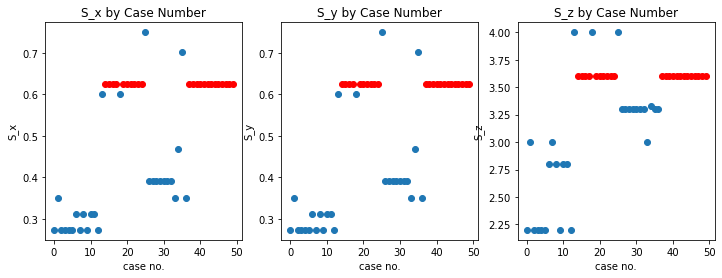

In [40]:
dataset = ds
columns = ['S_x', 'S_y', 'S_z']
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, column in enumerate(columns):
    mask = np.abs(dataset.data[column] - dataset.reference_spacing[i]) < 1e-3
    x = dataset.data[column].index
    y_ref = dataset.data[column].where(mask, None)
    y = dataset.data[column].where(~mask, None)
    axes[i].scatter(x, y)
    axes[i].scatter(x, y_ref, color='red')
    axes[i].set_xlabel('case no.')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} by Case Number')

In [44]:
ds.data.to_csv('metadata.csv')

In [41]:
ds.data_resampled

,D_x,D_y,D_z,S_x,S_y,S_z,voxel_volume,max_mri_intensity,min_mri_intensity,mean_mri_intensity,std_mri_intensity,seg_total_voxels,prostate_volume,total_image_volume
case,,,,,,,,,,,,,,
0,224.0,224.0,29.0,0.625,0.625,3.6,1.406249,10419.403320,0.0,216.362930,249.862686,32050.0,45070.285156,2046238.750
1,288.0,288.0,24.0,0.625,0.625,3.6,1.406250,390.184967,0.0,85.645485,53.660828,30978.0,43562.800781,2799359.250
2,224.0,224.0,33.0,0.625,0.625,3.6,1.406250,NaN,NaN,NaN,NaN,20489.0,28812.660156,2328480.250
3,224.0,224.0,26.0,0.625,0.625,3.6,1.406250,24124.714844,0.0,938.770020,643.129883,17331.0,24371.716797,1834559.750
4,224.0,224.0,28.0,0.625,0.625,3.6,1.406249,13095.301758,0.0,204.997925,255.187576,25404.0,35724.351562,1975678.750
5,224.0,224.0,26.0,0.625,0.625,3.6,1.406251,NaN,NaN,NaN,NaN,42789.0,60172.082031,1834561.500
6,256.0,256.0,30.0,0.625,0.625,3.6,1.406250,NaN,NaN,NaN,NaN,99334.0,139688.453125,2764800.500
7,224.0,224.0,28.0,0.625,0.625,3.6,1.406249,805.176086,0.0,62.218285,39.543068,30450.0,42820.281250,1975678.500
8,256.0,256.0,31.0,0.625,0.625,3.6,1.406250,19950.554688,0.0,874.965271,649.777893,20966.0,29483.439453,2856960.250
